In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import pickle

In [2]:
# config of inputs
out_dir = 'data'
out_version = 'v0'

In [3]:
df_collection = pickle.load(open( "{}/Xy_collection_{}.pickle".format(out_dir, out_version), "rb" ))

In [4]:
df_collection.keys()

dict_keys(['y_train', 'y_valid', 'X_train_raw', 'X_valid_raw', 'X_test_raw', 'X_train_pca_trunk', 'X_valid_pca_trunk', 'X_test_pca_trunk', 'X_train_pca_mini', 'X_valid_pca_mini', 'X_test_pca_mini', 'X_train_pca_full', 'X_valid_pca_full', 'X_test_pca_full', 'X_train_ica_full', 'X_valid_ica_full', 'X_test_ica_full', 'X_train_ica_mini', 'X_valid_ica_mini', 'X_test_ica_mini', 'X_train_raw_StandardScaler', 'X_valid_raw_StandardScaler', 'X_test_raw_StandardScaler', 'X_train_pca_trunk_StandardScaler', 'X_valid_pca_trunk_StandardScaler', 'X_test_pca_trunk_StandardScaler', 'X_train_pca_mini_StandardScaler', 'X_valid_pca_mini_StandardScaler', 'X_test_pca_mini_StandardScaler', 'X_train_pca_full_StandardScaler', 'X_valid_pca_full_StandardScaler', 'X_test_pca_full_StandardScaler', 'X_train_ica_full_StandardScaler', 'X_valid_ica_full_StandardScaler', 'X_test_ica_full_StandardScaler', 'X_train_ica_mini_StandardScaler', 'X_valid_ica_mini_StandardScaler', 'X_test_ica_mini_StandardScaler', 'X_train_raw_

In [17]:
transforms_strings = [s[len('X_train_'):] for s in  df_collection.keys() if 'X_train' in s]

In [18]:
transforms_strings

['raw',
 'pca_trunk',
 'pca_mini',
 'pca_full',
 'ica_full',
 'ica_mini',
 'raw_StandardScaler',
 'pca_trunk_StandardScaler',
 'pca_mini_StandardScaler',
 'pca_full_StandardScaler',
 'ica_full_StandardScaler',
 'ica_mini_StandardScaler',
 'raw_MinMaxScaler',
 'pca_trunk_MinMaxScaler',
 'pca_mini_MinMaxScaler',
 'pca_full_MinMaxScaler',
 'ica_full_MinMaxScaler',
 'ica_mini_MinMaxScaler']

# Simple Train/Validation evaluation

In [12]:
# Added to suppress warnings from model fiting of type
# DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. 
import warnings
warnings.filterwarnings('ignore', 'The truth value of an empty array is ambiguous. .*')

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

In [43]:
models = {'knn3': KNeighborsClassifier(n_neighbors=3), 
          'knn5':  KNeighborsClassifier(n_neighbors=5), 
          'knn7':  KNeighborsClassifier(n_neighbors=7),
          'knn10':  KNeighborsClassifier(n_neighbors=10),
          'LogRegL2':  LogisticRegression(penalty='l2', random_state=314),
          'LogRegL1':  LogisticRegression(penalty='l1', random_state=314),
          'RbfSVC': SVC(),
          'LinearSVC' : LinearSVC(),
          'XGB_depth3':  xgb.XGBClassifier(max_depth=3, random_state=314, seed=314, silent=True),
          'XGB_depth5':  xgb.XGBClassifier(max_depth=5, random_state=314, seed=314, silent=True),
          'XGB_depth7':  xgb.XGBClassifier(max_depth=7, random_state=314, seed=314, silent=True),
          'XGB_opt':     xgb.XGBClassifier(colsample_bytree= 0.90, max_depth= 6, min_child_weight= 2, reg_alpha= 1e-05, reg_lambda= 5, subsample= 0.80, random_state=314, seed=314, silent=True),
          'LGB_depth2leaves4':   lgb.LGBMClassifier(max_depth=2, num_leaves=4, random_state=314),
          'LGB_depthINFleaves7': lgb.LGBMClassifier(max_depth=-1, num_leaves=7, random_state=314),
          'LGB_depth3leaves7':   lgb.LGBMClassifier(max_depth=3, num_leaves=7, random_state=314),
          'LGB_depth5leaves31':  lgb.LGBMClassifier(max_depth=5, num_leaves=31, random_state=314),
          'LGB_opt':             lgb.LGBMClassifier(colsample_bytree= 0.76, max_depth= -1, min_child_weight= 6, num_leaves= 8, reg_alpha= 0.1, reg_lambda= 0, subsample= 0.80, random_state=314)}

acc_valid_summary = pd.DataFrame(index=models.keys(), columns=transforms_strings, dtype=np.float32)
acc_train_summary = pd.DataFrame(index=models.keys(), columns=transforms_strings, dtype=np.float32)
fit_time_summary  = pd.DataFrame(index=models.keys(), columns=transforms_strings, dtype=np.float32)

def benchmarkModels(df_dict, transform_name=''):
    for clf_name, clf in models.items():
        clf.fit(df_dict['X_train_{}'.format(transform_name)], df_dict['y_train'])
        pred = clf.predict(df_dict['X_valid_{}'.format(transform_name)])
        acc_valid_summary.loc[clf_name, transform_name] = accuracy_score(df_dict['y_valid'], 
                                                                         pred)
        acc_train_summary.loc[clf_name, transform_name] = accuracy_score(df_dict['y_train'], 
                                                                     clf.predict(df_dict['X_train_{}'.format(transform_name)]))
        #print('For the classifier {} the accuracy is {}'.format(clf_name,
        #                                                    accuracy_score(y_valid, pred)))

In [44]:
for t_name in transforms_strings:
    print('========== ', t_name,' =====================')
    benchmarkModels(df_collection, t_name)


==========  raw  =====================
==========  pca_trunk  =====================
==========  pca_mini  =====================
==========  pca_full  =====================
==========  ica_full  =====================
==========  ica_mini  =====================
==========  raw_StandardScaler  =====================
==========  pca_trunk_StandardScaler  =====================
==========  pca_mini_StandardScaler  =====================
==========  pca_full_StandardScaler  =====================
==========  ica_full_StandardScaler  =====================
==========  ica_mini_StandardScaler  =====================
==========  raw_MinMaxScaler  =====================
==========  pca_trunk_MinMaxScaler  =====================
==========  pca_mini_MinMaxScaler  =====================
==========  pca_full_MinMaxScaler  =====================
==========  ica_full_MinMaxScaler  =====================
==========  ica_mini_MinMaxScaler  =====================


Text(0.5,1,'Accuracy validation sample')

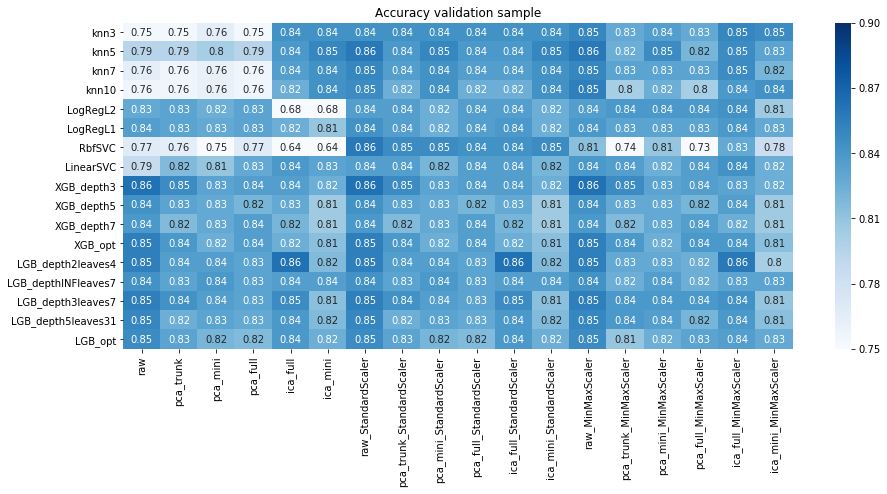

In [60]:
plt.figure(figsize=(15,6))
sns.heatmap(acc_valid_summary, cmap='Blues', annot=True, vmin=0.75, vmax=0.9)
plt.title('Accuracy validation sample')

Text(0.5,1,'Accuracy train sample')

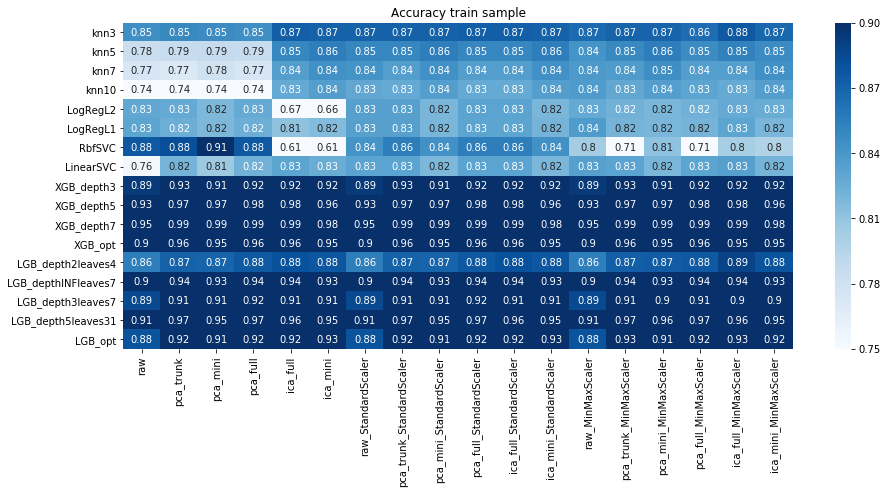

In [61]:
plt.figure(figsize=(15,6))
sns.heatmap(acc_train_summary, cmap='Blues', annot=True, vmin=0.75, vmax=0.9)
plt.title('Accuracy train sample')

# Advanced evaluation based on cross validation
Usage of cross validation requires building a pipeline and redoing PCA/ICA as well as various scalers from the unprocessed features. If one tries it on the stored features, then one sees strange effects, when results for all transformed data are the same. This is due to data leakage- transformers were trained on the train sub-sample and thus they leak info about left-out folds.

In [47]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

transforms = {'raw': None,
              'pca_trunk': PCA(svd_solver='full',  n_components='mle'),
              'pca_mini' : PCA(svd_solver='full',  n_components=10),
              'pca_full' : PCA(),
              'ica_full' : FastICA(random_state=314),
              'ica_mini' : FastICA(random_state=314, n_components=10)}
scalers = {'StandardScaler': StandardScaler(), 
           'MinMaxScaler': MinMaxScaler()}

acc_valid_cv_summary = pd.DataFrame(index=models.keys(), columns=transforms, dtype=np.float32)
acc_train_cv_summary = pd.DataFrame(index=models.keys(), columns=transforms, dtype=np.float32)
fit_time_cv_summary  = pd.DataFrame(index=models.keys(), columns=transforms, dtype=np.float32)

def benchmarkModelsCV(df_dict, transform_name=''):
    for clf_name, clf in models.items():
        #construct a pipeline and add 
        steps = []
        # add transformations, that are needed
        for t_name in transforms.keys():
            if t_name in transform_name:
                steps.append((t_name, transforms[t_name]))
        # add scalers that are needed
        for s_name in scalers.keys():
            if s_name in transform_name:
                steps.append((s_name, scalers[s_name]))
        # add the classifier as the last element in the chain
        steps.append(('clf', clf))
        # construct a pipeline out of prepared transforms and clf
        pipe = Pipeline(steps=steps)
        # Let's run cross validation on the prepared pipeline
        # Note, that  we run it on the full train+valid sample:
        # this increases statistics and we do not need the valid sample, 
        # as we do not plan to to HP optimisation for this study
        score = cross_validate(pipe,
                               #X=df_collection['X_train_{}'.format('raw')], 
                               #y=df_collection['y_train'],
                               X = pd.concat([df_collection['X_train_{}'.format('raw')],
                                              df_collection['X_valid_{}'.format('raw')]]), 
                               y = pd.concat([df_collection['y_train'],
                                              df_collection['y_valid']]),
                               scoring=make_scorer(accuracy_score, greater_is_better=True),
                               cv=3, 
                               return_train_score=True)
        # save evaluated performance results
        acc_valid_cv_summary.loc[clf_name, transform_name] = score['test_score'].mean()
        acc_train_cv_summary.loc[clf_name, transform_name] = score['train_score'].mean()
        fit_time_cv_summary.loc[clf_name, transform_name] = score['fit_time'].mean()


In [48]:
for t_name in transforms_strings:
    print('========== ', t_name,' =====================')
    benchmarkModelsCV(df_collection, t_name)

==========  raw  =====================
==========  pca_trunk  =====================
==========  pca_mini  =====================
==========  pca_full  =====================
==========  ica_full  =====================
==========  ica_mini  =====================
==========  raw_StandardScaler  =====================
==========  pca_trunk_StandardScaler  =====================
==========  pca_mini_StandardScaler  =====================
==========  pca_full_StandardScaler  =====================
==========  ica_full_StandardScaler  =====================
==========  ica_mini_StandardScaler  =====================
==========  raw_MinMaxScaler  =====================
==========  pca_trunk_MinMaxScaler  =====================
==========  pca_mini_MinMaxScaler  =====================
==========  pca_full_MinMaxScaler  =====================
==========  ica_full_MinMaxScaler  =====================
==========  ica_mini_MinMaxScaler  =====================


Text(0.5,1,'Validation sample (mean from CV)')

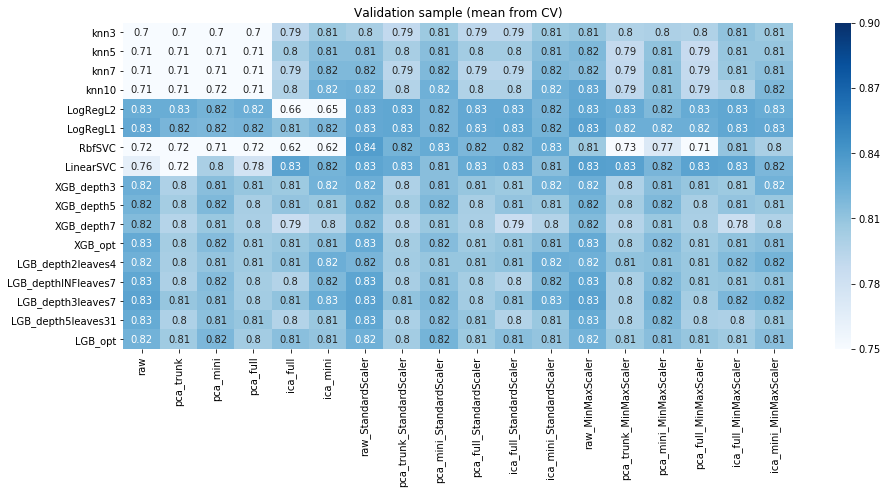

In [54]:
plt.figure(figsize=(15,6))
sns.heatmap(acc_valid_cv_summary, cmap='Blues', annot=True, vmin=0.75, vmax=0.9)
plt.title('Accuracy on validation sample (mean from CV)')

Text(0.5,1,'Accuracy on train sample (mean from CV)')

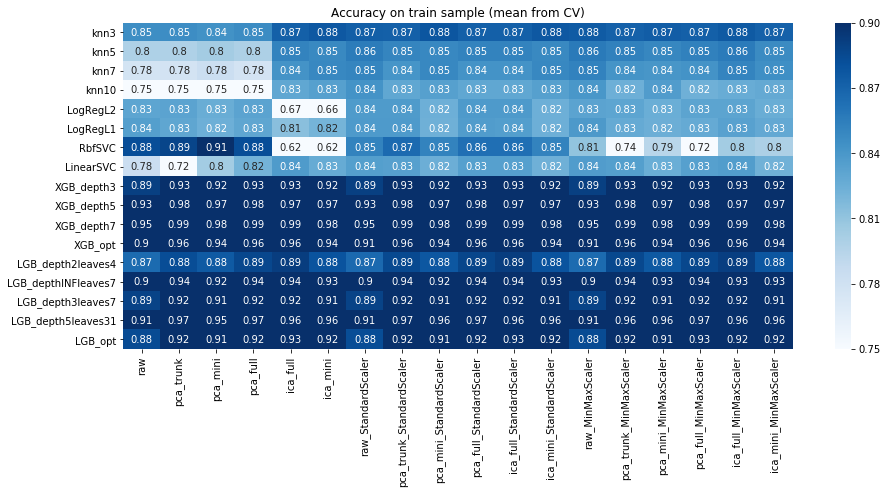

In [57]:
plt.figure(figsize=(15,6))
sns.heatmap(acc_train_cv_summary, cmap='Blues', annot=True, vmin=0.75, vmax=0.9)
plt.title('Accuracy on train sample (mean from CV)')

Text(0.5,1,'Training time, sec (mean from CV)')

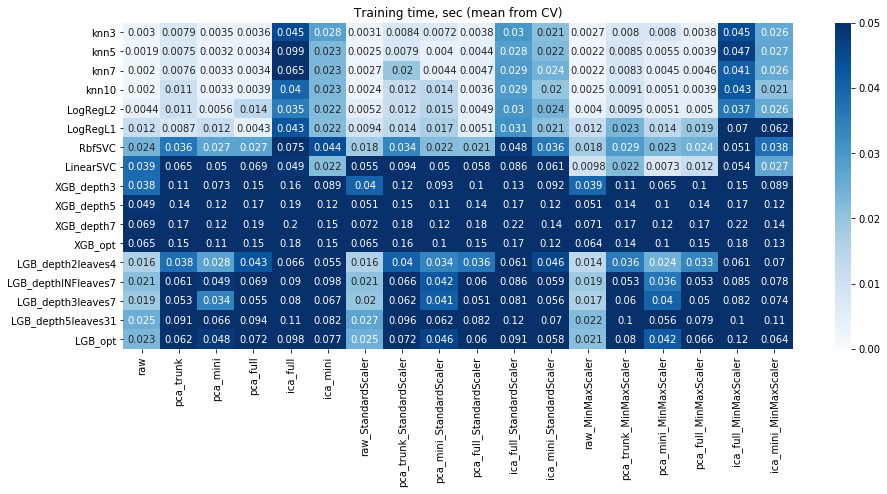

In [59]:
plt.figure(figsize=(15,6))
sns.heatmap(fit_time_cv_summary, cmap='Blues', annot=True, vmin=0.00, vmax=0.05)
plt.title('Training time, sec (mean from CV)')

# Re-train the chosen  model on the full train+valid sample and predict on the test sample
Choose your favorite input data preprocessing and a model

In [86]:
opt_features = 'raw_StandardScaler'
opt_model = ('XGB_opt',     xgb.XGBClassifier(colsample_bytree= 0.90, max_depth= 6, min_child_weight= 2, reg_alpha= 1e-05, reg_lambda= 5, subsample= 0.80, random_state=314, seed=314, silent=True))

#construct a pipeline since we want to retrain transformers on the full data as well
steps = []
# add transformations, that are needed
for t_name in transforms.keys():
    if t_name in opt_features:
        steps.append((t_name, transforms[t_name]))
# add scalers that are needed
for s_name in scalers.keys():
    if s_name in opt_features:
        steps.append((s_name, scalers[s_name]))
# add the classifier as the last element in the chain
steps.append(('clf', opt_model[1]))
# construct a pipeline out of prepared transforms and clf
pipe = Pipeline(steps=steps)

pipe.fit(pd.concat([df_collection['X_train_{}'.format('raw')],
                    df_collection['X_valid_{}'.format('raw')]]), 
         pd.concat([df_collection['y_train'],
                    df_collection['y_valid']]))

preds = pipe.predict(df_collection['X_test_{}'.format('raw')])

In [87]:
import pickle

pickle.dump(preds, open( "{}/pred_{}_{}.pickle".format(out_dir, opt_features, opt_model[0]), "wb" ))